In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#使用numpy生产200个线性的随机点
x_data = np.linspace(1,100,200)[:,np.newaxis]
#print(x_data,x_data.shape)
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

In [3]:
#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

In [4]:
#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
Bias_L1 = tf.Variable(tf.random_normal([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1)+Bias_L1 #注意矩阵乘法的前后顺序
L1 = tf.nn.tanh(Wx_plus_b_L1)
'''tf.global_variables_initializer()
with tf.Session() as sess:
    print(sess.run([Weights_L1,Bias_L1]))'''

'tf.global_variables_initializer()\nwith tf.Session() as sess:\n    print(sess.run([Weights_L1,Bias_L1]))'

In [5]:
#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
Bias_L2 = tf.Variable(tf.random_normal([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + Bias_L2 #注意矩阵乘法的前后顺序
prediction = tf.nn.tanh(Wx_plus_b_L2)

20345104.0
20345104.0
20345104.0
20345104.0
20345104.0


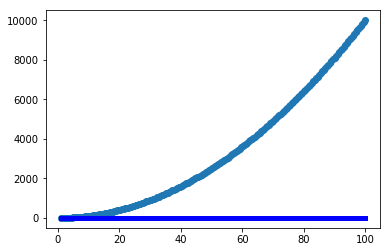

In [6]:
#定义损失函数
loss = tf.reduce_mean(tf.square(y - prediction))
tran_step =  tf.train.GradientDescentOptimizer(0.03).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(tran_step, feed_dict = {x:x_data, y:y_data})
        if i%400 == 0:
            print(sess.run(loss, feed_dict={x:x_data, y:y_data}))
    #获得预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'b',lw=5)
    plt.show()